In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [16]:
dataset = pd.read_csv('Airpassengers.csv')
dataset['#Passengers'] 


0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [17]:
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)


In [19]:
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

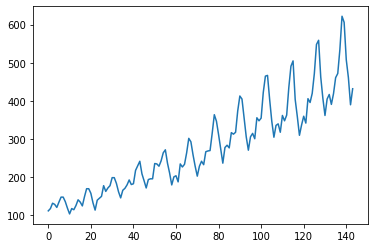

In [23]:
plt.plot(dataset)

In [56]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset
scaler.scale_

array([1.])

## Creating training and test set

In [57]:
train_size = 100
test_size = 44

In [58]:
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [60]:
test = dataset[train_size:144,:]
test.shape

(44, 1)

### Building training and testing dataset

In [61]:
def get_data(dataset,look_back):
    dataX,dataY = [],[]

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [62]:
look_back =1
X_train,y_train = get_data(train,look_back)

In [63]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [64]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [77]:
X_test, y_test = get_data(test,look_back)

In [85]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [67]:
X_train.shape

(98, 1, 1)

### Building model

In [107]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer= 'adam')


In [101]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.fit(X_train,y_train, epochs = 150, verbose =1)

Train on 98 samples
Epoch 1/150
98/98 [==============================] - 0s 429us/sample - loss: 0.0029
Epoch 2/150
98/98 [==============================] - 0s 255us/sample - loss: 0.0028
Epoch 3/150
98/98 [==============================] - 0s 337us/sample - loss: 0.0028
Epoch 4/150
98/98 [==============================] - 0s 378us/sample - loss: 0.0028
Epoch 5/150
98/98 [==============================] - 0s 296us/sample - loss: 0.0028
Epoch 6/150
98/98 [==============================] - 0s 327us/sample - loss: 0.0028
Epoch 7/150
98/98 [==============================] - 0s 347us/sample - loss: 0.0027
Epoch 8/150
98/98 [==============================] - 0s 408us/sample - loss: 0.0027
Epoch 9/150
98/98 [==============================] - 0s 306us/sample - loss: 0.0027
Epoch 10/150
98/98 [==============================] - 0s 306us/sample - loss: 0.0027
Epoch 11/150
98/98 [==============================] - 0s 429us/sample - loss: 0.0027
Epoch 12/150
98/98 [==============================] - 

Epoch 97/150
98/98 [==============================] - 0s 296us/sample - loss: 0.0021
Epoch 98/150
98/98 [==============================] - 0s 327us/sample - loss: 0.0021
Epoch 99/150
98/98 [==============================] - 0s 296us/sample - loss: 0.0021
Epoch 100/150
98/98 [==============================] - 0s 775us/sample - loss: 0.0021
Epoch 101/150
98/98 [==============================] - 0s 408us/sample - loss: 0.0021
Epoch 102/150
98/98 [==============================] - 0s 214us/sample - loss: 0.0022
Epoch 103/150
98/98 [==============================] - 0s 194us/sample - loss: 0.0022
Epoch 104/150
98/98 [==============================] - 0s 194us/sample - loss: 0.0022
Epoch 105/150
98/98 [==============================] - 0s 173us/sample - loss: 0.0021
Epoch 106/150
98/98 [==============================] - 0s 173us/sample - loss: 0.0021
Epoch 107/150
98/98 [==============================] - 0s 194us/sample - loss: 0.0021
Epoch 108/150
98/98 [==============================] - 0s

In [110]:
y_pred = model.predict(X_test)

In [51]:
scaler.scale_

array([1.])

In [72]:
y_pred = scaler.inverse_transform(y_pred)


In [75]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

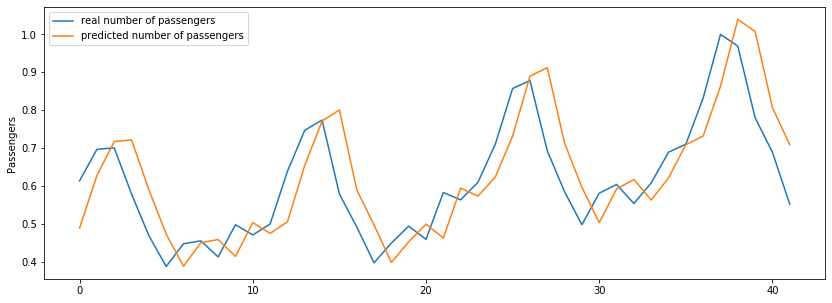

In [111]:
plt.figure(figsize = (14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel ('Passengers')
plt.legend()
plt.show()